In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer


In [188]:
df=pd.read_csv('./csv/apartments_db.mubawab.csv')
print(df.head())

                                                 _id gouvernorat  \
0  9640d5dccdfd9b5c4a45e8406c32751838aca9029d66f8...       tunis   
1  8ae77a6b1c36d45ddb78aa7dd34d9cd3a21a89073927ac...       tunis   
2  723d5c50c2ea07db6a21f6805449bab0acccdeb280ef71...       tunis   
3  6e7883ddcf44a125dd34f600fe664891b7b1c75d953d92...       tunis   
4  47643d27c8e43aae55bd07969263224dc09b417bc37030...       tunis   

                          delegation      prix  superficie  nb_pieces  \
0  Les Jardins de Carthage à Le Kram       NaN         125        3.0   
1  Les Jardins de Carthage à Le Kram       NaN         181        4.0   
2  Les Jardins de Carthage à Le Kram       NaN          65        2.0   
3                  Aouina à La Marsa  340000.0          88        3.0   
4       Ain Zaghouan Nord à La Marsa       NaN         121        3.0   

   chambres  salle_de_bains           etat etage       standing  \
0       2.0             2.0  Moins d'un an  2ème  Haut standing   
1       3.0       

In [189]:
df.drop(columns=['_id', 'nb_pieces', 'standing', 'description'], inplace=True)

In [190]:
print(df.head())

  gouvernorat                         delegation      prix  superficie  \
0       tunis  Les Jardins de Carthage à Le Kram       NaN         125   
1       tunis  Les Jardins de Carthage à Le Kram       NaN         181   
2       tunis  Les Jardins de Carthage à Le Kram       NaN          65   
3       tunis                  Aouina à La Marsa  340000.0          88   
4       tunis       Ain Zaghouan Nord à La Marsa       NaN         121   

   chambres  salle_de_bains           etat etage  
0       2.0             2.0  Moins d'un an  2ème  
1       3.0             2.0  Moins d'un an   NaN  
2       1.0             1.0        Nouveau   NaN  
3       2.0             1.0  Moins d'un an   NaN  
4       2.0             2.0  Moins d'un an  2ème  


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2637 entries, 0 to 2636
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gouvernorat     2637 non-null   object 
 1   delegation      2637 non-null   object 
 2   prix            2044 non-null   float64
 3   superficie      2637 non-null   int64  
 4   chambres        2370 non-null   float64
 5   salle_de_bains  2239 non-null   float64
 6   etat            2332 non-null   object 
 7   etage           964 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 164.9+ KB


# gouvernorat

In [192]:
print(df.gouvernorat.unique()) 
count = []
for gouv in df.gouvernorat.unique():
    print(gouv, len(df[df.gouvernorat == gouv]))
    count.append(len(df[df.gouvernorat == gouv]))

['tunis' 'ariana' 'ben-arous' 'la-manouba']
tunis 1426
ariana 936
ben-arous 209
la-manouba 66


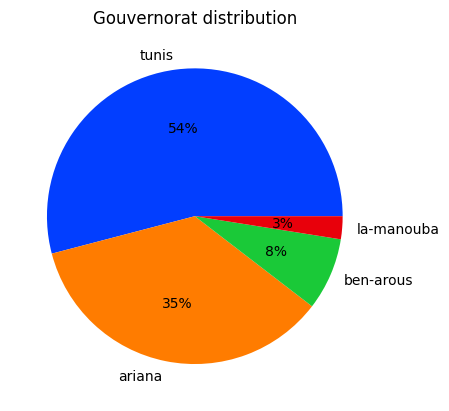

In [193]:
# declaring data 
keys = [i for i in df.gouvernorat.unique()] 

# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 

# plotting data on chart 

plt.pie(count, labels=keys, colors=palette_color, autopct='%.0f%%') 
plt.title('Gouvernorat distribution')
# displaying chart 
plt.show() 


# Delegation

[
    "Bab Bhar",
    "Bab El Khadra"
    "Bab Saadoun",
    "Bab Souika",
    "Carthage",
    "Cité El Khadra",
    "Les Berges Du Lac",
    "El Menzah",
    "El Omrane",
    "El Omrane supérieur",
    "El Ouardia",
    "Ettahrir",
    "Hraïria",
    "La Goulette",
    "La Marsa",
    "Le Bardo",
    "Le Kram",
    "Ain Zaghouan"
]


In [194]:
data_tunis=df[df.gouvernorat == 'tunis']
print(data_tunis.delegation.unique())
print(len(data_tunis.delegation.unique()))

['Les Jardins de Carthage à Le Kram' 'Aouina à La Marsa'
 'Ain Zaghouan Nord à La Marsa' 'Tunis' 'La Marsa'
 'El Manar 2 à El Menzah' 'Sidi Daoued à La Marsa' 'Gammarth à La Marsa'
 'Bhar Lazreg à La Marsa' 'La Marsa à La Marsa'
 'Gammarth Supérieur à La Marsa' 'Le Bardo à Le Bardo'
 'Mutuelle Ville à El Menzah' 'Carthage à Carthage'
 'El Menzah 9 à El Menzah' 'Les Berges Du Lac 2 à La Marsa'
 'Cité El Khalil à La Marsa' 'Centre Urbain Nord à Cité El Khadra'
 'La Goulette Casino à La Goulette' 'Les Berges Du Lac 1 à La Marsa'
 'Cité Olympique à Cité El Khadra' 'La Goulette à La Goulette'
 'Bab Saadoun à Tunis' 'Bab Bhar à Tunis' 'Gammarth Village à La Marsa'
 'Le Kram à Le Kram' 'El Omrane à El Omrane' 'El Hrairia à El Hrairia'
 'Cité Ubn Khaldoun à El Omrane Superieur' 'Carthage Byrsa à Carthage'
 'El Ouardia à El Ouardia' 'Ain Zaghouan Sud à La Marsa'
 'Habib Thameur à Tunis' 'La Perle du Lac 1 à La Marsa'
 'Sidi Bousaid à Carthage' 'El Manar 1 à El Menzah'
 'Bellevue à El Ouardia' '

In [195]:
replacements = {
    'bab bhar': 'Bab Bhar',
    'bab el khadra': 'Bab El Khadra',
    'saadoun': 'Bab Saadoun',
    'bab souika': 'Bab Souika',
    'kram': 'Kram',
    'carthage': 'Kram',
    'cite el khadra': 'Cite El Khadra',
    'lac': 'Les Berges Du Lac',
    'manar': 'El Manar',
    'menzah 1': 'El Menzah 1',
    'menzah 4': 'El Menzah 4',
    'menzah 9': 'El Menzah 9',
    'menzah': 'El Menzah 1',
    'omrane': 'El Omrane',
    'ouardia': 'El Ouardia',
    'ettahrir': 'Ettahrir',
    'hrairia': 'Hrairia',
    'goulette': 'La Goulette',
    'ain zaghouan': 'Ain Zaghouan',
    'aouina': 'Aouina',
    'gammarth': 'Gammarth',
    'marsa': 'La Marsa',
    'bardo' : 'Le Bardo',
    'montplaisir': 'Montplaisir',
    'sidi hassine': 'Sidi Hassine',
    'montfleury': 'Montfleury',
    'tunis': 'El Ouardia',
}

# Convert to lowercase, replace substrings, and map to replacement values
def replace_delegation(delegation):
    if delegation is np.nan:
        delegation= 'marsa'
    delegation_lower = delegation.lower().replace('é', 'e')
    
    for substring, replacement in replacements.items():
        if substring in delegation_lower:
            return replacement
    return delegation  # Keep original if no match is found

# Apply the function to the 'delegation' column
df['delegation'] = df['delegation'].apply(replace_delegation)


In [196]:
data_tunis=df[df.gouvernorat == 'tunis']
print(data_tunis.delegation.unique())
print(len(data_tunis.delegation.unique()))

['Kram' 'Aouina' 'Ain Zaghouan' 'El Ouardia' 'La Marsa' 'El Manar'
 'Gammarth' 'Le Bardo' 'El Menzah 1' 'El Menzah 9' 'Les Berges Du Lac'
 'Cite El Khadra' 'La Goulette' 'Bab Saadoun' 'Bab Bhar' 'El Omrane'
 'Hrairia' 'Sidi Hassine' 'Bab El Khadra' 'Montfleury' 'Montplaisir'
 'Ettahrir' 'Sijoumi']
23


In [197]:
data_ariana=df[df.gouvernorat == 'ariana']
print(data_ariana.delegation.unique())
print(len(data_ariana.delegation.unique()))

['Borj Louzir à La Soukra' 'La Soukra à La Soukra' 'Ariana à Ariana Ville'
 'Cité el Ghazela à Raoued' 'Cité Ennasr 2 à Ariana Ville'
 'Cité Ennasr 1 à Ariana Ville' 'Chotrana 1 à La Soukra' 'La Soukra'
 'El Menzah 1' 'Ariana Ville' 'Riadh al Andalous à Ariana Ville'
 'Raoued à Raoued' 'Chotrana 3 à La Soukra' 'Chotrana 2 à La Soukra'
 'Cité Ennkhilet à Raoued' 'Cité El Behi Ladghem à La Soukra'
 'Mnihla à Mnihla' 'Sidi Frej à La Soukra'
 'Cité Bir El Araies à Kalaat Landalous' 'Chorchef 2 à Sidi Thabet'
 'Cité El Mourouj à Kalaat Landalous' 'Cité Ennour Jaafar à Raoued'
 'Cité de la santé à La Soukra' 'Cité Touilia à La Soukra'
 'Cité El Mansoura à La Soukra' 'Cité El Boustene 2 à La Soukra'
 'Ariana Essoghra à Raoued' 'Cité des Roses à Ariana Ville'
 'Cité Aeroport à Raoued' 'Cité Hedi Nouira à La Soukra' 'Kram'
 'Pont de Bizerte à Kalaat Landalous' 'Dar Fadhal à La Soukra'
 'Cité de la Sante à Ariana Ville' 'Ennasr à Ariana Ville'
 'Borj Baccouche à Ariana Ville' 'Cité Ennasr à Raou

In [198]:
replacements = {
    'soukra': 'La Soukra',
    'ghazela': 'Cite El Ghazela',
    'ennasr': 'Cite Ennasr',
    'raoued': 'Raoued',
    'kalaat landalous': 'Kalaat Landalous',
    'sidi thabet': 'Ariana Ville',
    'mnihla': 'Ariana Ville',
    'menzah 6': 'El Menzah 6',
    'menzah 7': 'El Menzah 7',
    'menzah 5': 'El Menzah 5',
    'menzah 8': 'El Menzah 8',
    'menzah': 'El Menzah 7',
    'kram': 'Ariana Ville',
    'marsa': 'Ariana Ville',
    'ariana': 'Ariana Ville'

}


# Convert to lowercase, replace substrings, and map to replacement values
def replace_delegation(delegation):
    if delegation is np.nan:
        delegation= 'marsa'
    delegation_lower = delegation.lower().replace('é', 'e')
    
    for substring, replacement in replacements.items():
        if substring in delegation_lower:
            return replacement
    return delegation  # Keep original if no match is found

# Apply the function to the 'delegation' column
df['delegation'] = df['delegation'].apply(replace_delegation)


In [199]:
data_ariana=df[df.gouvernorat == 'ariana']
print(data_ariana.delegation.unique())
print(len(data_ariana.delegation.unique()))

['La Soukra' 'Ariana Ville' 'Cite El Ghazela' 'Cite Ennasr' 'El Menzah 7'
 'Raoued' 'Kalaat Landalous' 'Aouina']
8


In [200]:
df_benarous=df[df.gouvernorat == 'ben-arous']
print(df_benarous.delegation.unique())
print(len(df_benarous.delegation.unique()))

['Mourouj à El Kabaria' 'Fouchana à Fouchana' 'El Mourouj 6 à El Mourouj'
 'Cité Bou Mhel à Boumhel Bassatine' 'Mornag à Mornag'
 'Nouvelle Medina à Nouvelle Medina' 'Bou Mhel à Boumhel Bassatine'
 'Rades Meliane à Rades' 'El Mourouj 3 à El Mourouj'
 'Borj Cedria à Hammam Chatt' 'Cité El Amel 2 à Fouchana'
 'El Mourouj 2 à El Mourouj' 'Ezzahra à Ezzahra'
 'El Mourouj 1 à El Mourouj' 'Hammam Lif à Hammam Lif'
 'Zone Industrielle El Meghira à Fouchana' 'Cité El Bochra à El Mourouj'
 'El Mourouj 5 à El Mourouj' 'Cité Mohamed Ali à Rades'
 'Cité Jardins à Mohamadia' 'Cité Ennacim 2 à Mohamadia'
 'Ben Arous à Ben Arous' 'Cité Erraoudha à El Mourouj'
 'Cité El Habib à Ezzahra' 'Ben Arous Sud à Ben Arous'
 'El Mourouj 4 à El Mourouj' 'Boumhel Bassatine'
 'Cité El Omri 2 à Mohamadia' 'Village Mediterranee à Rades' 'Rades'
 'Cité Ennour à Rades' 'Cité Ennakhil 2 à Ezzahra' 'Radès à Rades'
 'Meghira Inzel à Fouchana' 'El Yasminette à Nouvelle Medina'
 'Cité Hedi Khfacha à Ezzahra' 'Rades Plage à

In [201]:
replacements = {
    'mourouj': 'El Mourouj',
    'fouchana': 'Fouchana',
    'boumhel': 'Boumhel',
    'mornag': 'Mornag',
    'rades': 'Rades',
    'borj cedria': 'Borj Cedria',
    'ezzahra': 'Ezzahra',
    'hammam': 'Hammam Lif',
    'mohamadia': 'Mohamadia',   
    'ben arous': 'Ben Arous',
    'medina': 'Ben Arous',
    'megrine': 'Megrine',
   }


# Convert to lowercase, replace substrings, and map to replacement values
def replace_delegation(delegation):
    delegation_lower = delegation.lower().replace('é', 'e')
    
    for substring, replacement in replacements.items():
        if substring in delegation_lower:
            return replacement
    return delegation  # Keep original if no match is found

# Apply the function to the 'delegation' column
df['delegation'] = df['delegation'].apply(replace_delegation)


In [202]:
df_benarous=df[df.gouvernorat == 'ben-arous']
print(df_benarous.delegation.unique())
print(len(df_benarous.delegation.unique()))

['El Mourouj' 'Fouchana' 'Boumhel' 'Mornag' 'Ben Arous' 'Rades'
 'Borj Cedria' 'Ezzahra' 'Hammam Lif' 'Mohamadia' 'Megrine']
11


In [203]:
df_manouba=df[df.gouvernorat == 'la-manouba']
print(df_manouba.delegation.unique())
print(len(df_manouba.delegation.unique()))

['La Manouba à La Manouba' 'Denden à La Manouba']
2


In [204]:
df.loc[df['delegation'].str.contains('manouba', case=False), 'delegation'] = 'La Manouba'

In [205]:
df_manouba=df[df.gouvernorat == 'la-manouba']
print(df_manouba.delegation.unique())
print(len(df_manouba.delegation.unique()))

['La Manouba']
1


In [206]:
df.to_csv('./csv/mubawab_preprocessed.csv', index=False)

In [207]:
print(df.superficie.describe())

count      2637.000000
mean        210.760713
std        2299.327998
min           1.000000
25%          97.000000
50%         125.000000
75%         164.000000
max      110000.000000
Name: superficie, dtype: float64


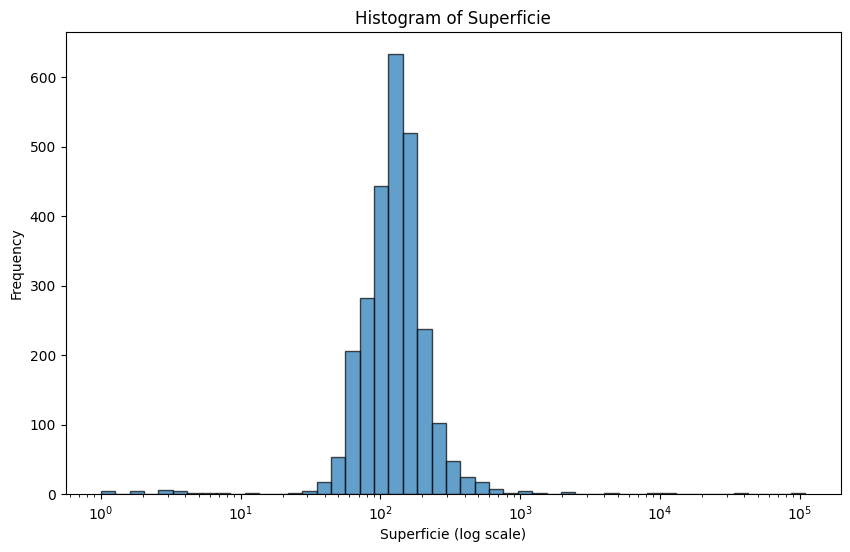

In [208]:
import matplotlib.pyplot as plt
import numpy as np

# Generate histogram with logarithmic bins
data = df['superficie']  # Replace `df` with your actual DataFrame name
bins = np.logspace(np.log10(data.min()), np.log10(data.max()), 50)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=bins, edgecolor='k', alpha=0.7)
plt.xscale('log')
plt.xlabel('Superficie (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Superficie')
plt.show()


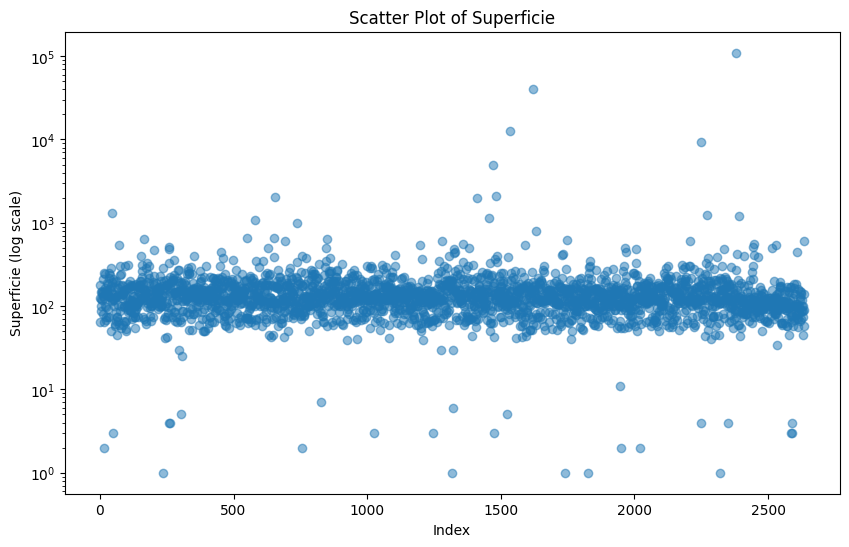

In [209]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(data)), data, alpha=0.5)
plt.yscale('log')
plt.xlabel('Index')
plt.ylabel('Superficie (log scale)')
plt.title('Scatter Plot of Superficie')
plt.show()


**handling noise & outliers**

min superficie 30 m²  max is 300 m²

In [216]:
count = 0  # Initialize the count variable

def round_up(value):
    global count  # Use the global count variable
    if value < 30:
        count += 1
        return 30
    elif value > 300:
        count += 1
        return 300
    return value  # Return the value unchanged if no condition is met

# Apply the function to the 'superficie' column
df['superficie'] = df['superficie'].apply(round_up)

# Print the count of modifications
print(count)


101


In [210]:
df_copy= df.drop(columns=['etat', 'etage'])
rows_with_nan = df_copy[(df_copy.isna().sum(axis=1) > 1) & (df_copy['prix'].isna())]

print(rows_with_nan)

     gouvernorat    delegation  prix  superficie  chambres  salle_de_bains
5          tunis  Ain Zaghouan   NaN         148       NaN             NaN
142        tunis    El Ouardia   NaN          74       1.0             NaN
164        tunis      Gammarth   NaN         643       NaN             NaN
238        tunis  Ariana Ville   NaN           1       2.0             NaN
437        tunis  Ariana Ville   NaN         118       NaN             NaN
...          ...           ...   ...         ...       ...             ...
2593  la-manouba    La Manouba   NaN          57       1.0             NaN
2594  la-manouba    La Manouba   NaN         125       1.0             NaN
2598  la-manouba    La Manouba   NaN          68       1.0             NaN
2600  la-manouba    La Manouba   NaN         107       1.0             NaN
2601  la-manouba    La Manouba   NaN         101       1.0             NaN

[77 rows x 6 columns]


In [211]:
df.drop(rows_with_nan.index, inplace=True)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2560 entries, 0 to 2636
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gouvernorat     2560 non-null   object 
 1   delegation      2560 non-null   object 
 2   prix            2044 non-null   float64
 3   superficie      2560 non-null   int64  
 4   chambres        2316 non-null   float64
 5   salle_de_bains  2239 non-null   float64
 6   etat            2285 non-null   object 
 7   etage           937 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 180.0+ KB


# KNN Imputer for price values

In [213]:
print(df.prix.describe())

count    2.044000e+03
mean     8.529978e+05
std      1.256493e+07
min      9.000000e+03
25%      2.680000e+05
50%      3.980000e+05
75%      5.906500e+05
max      5.200000e+08
Name: prix, dtype: float64


In [220]:
count = (df['prix'] >900000).sum()  # Count the number of rows where price < X
print(count)

174


In [214]:
# imputer = KNNImputer(n_neighbors=5)
# df[['prix']] = imputer.fit_transform(df[['prix']])


In [215]:
print(df.prix.describe())

count    2.044000e+03
mean     8.529978e+05
std      1.256493e+07
min      9.000000e+03
25%      2.680000e+05
50%      3.980000e+05
75%      5.906500e+05
max      5.200000e+08
Name: prix, dtype: float64
